H0 = Todo los tratamientos son iguales
H1 = Hay diferencia en los tratamientos

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import researchpy as rp
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [18]:
df1 = pd.read_csv("ensayo-productos-1.tsv", delimiter="\t")
df2 = pd.read_csv("ensayo-productos-2.tsv", delimiter="\t")

In [19]:
df2.head(10)

,TRATAMIENTOS,COLOR,PESO,CALIBRE
0,TIME+FOLOKIN- 25DDPF,Oscura,10.8,2J
1,TIME+FOLOKIN- 25DDPF,Oscura,9.6,J
2,TIME+FOLOKIN- 25DDPF,Oscura,9.0,XL
3,TIME+FOLOKIN- 25DDPF,Oscura,9.1,XL
4,TIME+FOLOKIN- 25DDPF,Oscura,8.3,XL
5,TIME+FOLOKIN- 25DDPF,Oscura,9.3,J
6,TIME+FOLOKIN- 25DDPF,Oscura,9.6,J
7,TIME+FOLOKIN- 25DDPF,Oscura,9.1,XL
8,TIME+FOLOKIN- 25DDPF,Oscura,10.1,J
9,TIME+FOLOKIN- 25DDPF,Oscura,10.0,J


In [10]:
#Fynciones para normalizar datos

def getCalibre(x):
    if x == 'L':
        return round(random.uniform(22,24), 1)
    if x == 'XL':
        return round(random.uniform(24,26), 1)
    if x == 'J':
        return round(random.uniform(26,28), 1)
    if x == '2J':
        return round(random.uniform(28,30), 1)
    if x == '3J':
        return round(random.uniform(30,32), 1)
    if x == '4J':
        return round(random.uniform(32,34), 1)

def getColor(x):
    if x == 'Blanca':
        return 1
    if x == 'Clara':
        return 2
    if x == 'Oscura':
        return 3

In [20]:
df2['CALIBRE'] = df2.CALIBRE.apply(func=getCalibre)
#df1['COLOR'] = df1.COLOR.apply(func=getColor)
tratamientos = df1.groupby('TRATAMIENTO')
T0 = tratamientos.get_group('T0')
T3L = tratamientos.get_group('T3L')
T6L = tratamientos.get_group('T6L')
T9L = tratamientos.get_group('T9L')
T12L = tratamientos.get_group('T12L')

In [21]:
#Revisar si valores distribuyen normal
data = df2['CALIBRE'].to_numpy()
alpha = 0.05
w, p = stats.shapiro(data)

if p > alpha:
    print(f"Los datos presentan un distribucion normal {p}")
else:
    print(f"Los datos no presentan un distribucion normal {p}")

Los datos no presentan un distribucion normal 0.009136201813817024


<Axes: xlabel='COLOR', ylabel='PESO'>

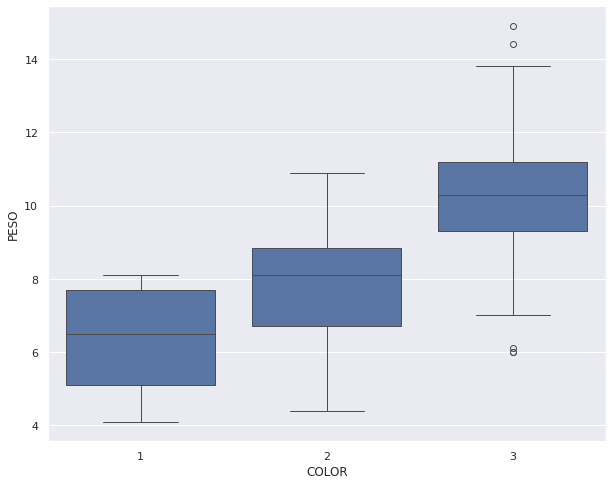

In [8]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(10, 8)})
sns.boxplot(data=df, x="COLOR", y="PESO")

<Axes: xlabel='TRATAMIENTO', ylabel='PESO'>

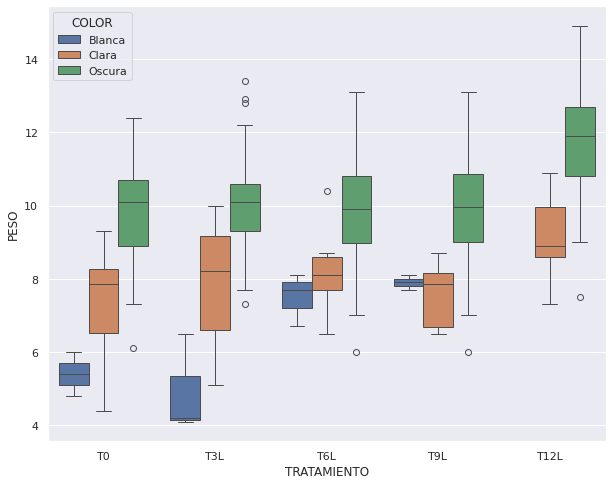

In [50]:
sns.boxplot(data=df, x="TRATAMIENTO", y="PESO", hue='COLOR')

In [37]:
""" tratamientos = df.groupby('TRATAMIENTOS') """
df.TRATAMIENTO.unique()

array(['T0', 'T3L', 'T6L', 'T9L', 'T12L'], dtype=object)

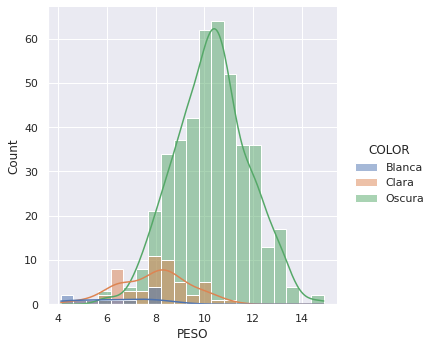

In [38]:
sns.displot(data=df, x="PESO", hue="COLOR", kde=True)

In [58]:
mod = ols('PESO ~ TRATAMIENTO + COLOR ', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
TRATAMIENTO,234.425714,4.0,33.529878,9.213323e-25
COLOR,347.756654,1.0,198.958346,3.308087e-38
Residual,863.456046,494.0,NaN,NaN


In [56]:
mc = MultiComparison( df['COLOR'], df['TRATAMIENTO'])
result = mc.tukeyhsd(0.05)
result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
T0,T12L,0.13,0.1745,-0.0304,0.2904,False
T0,T3L,-0.02,0.9971,-0.1804,0.1404,False
T0,T6L,0.05,0.9136,-0.1104,0.2104,False
T0,T9L,0.08,0.6502,-0.0804,0.2404,False
T12L,T3L,-0.15,0.0796,-0.3104,0.0104,False
T12L,T6L,-0.08,0.6502,-0.2404,0.0804,False
T12L,T9L,-0.05,0.9136,-0.2104,0.1104,False
T3L,T6L,0.07,0.7545,-0.0904,0.2304,False
T3L,T9L,0.1,0.4308,-0.0604,0.2604,False
T6L,T9L,0.03,0.9862,-0.1304,0.1904,False


In [57]:
rp.summary_cont(df['COLOR'].groupby(df['TRATAMIENTO']))

,N,Mean,SD,SE,95% Conf.,Interval
TRATAMIENTO,,,,,,
T0,100,2.80,0.4714,0.0471,2.7065,2.8935
T12L,100,2.93,0.2564,0.0256,2.8791,2.9809
T3L,100,2.78,0.4837,0.0484,2.6840,2.8760
T6L,100,2.85,0.4352,0.0435,2.7636,2.9364
T9L,100,2.88,0.3835,0.0383,2.8039,2.9561


In [42]:
stats.f_oneway(df['PESO'][df['TRATAMIENTO'] == 'T0'],
               df['PESO'][df['TRATAMIENTO'] == 'T3L'],
               df['PESO'][df['TRATAMIENTO'] == 'T6L'],
               df['PESO'][df['TRATAMIENTO'] == 'T9L'],
               df['PESO'][df['TRATAMIENTO'] == 'T12L'],
               )

F_onewayResult(statistic=30.379816030660848, pvalue=1.2591476581296452e-22)

In [43]:
result = stats.tukey_hsd(df['PESO'][df['TRATAMIENTO'] == 'T0'],
               df['PESO'][df['TRATAMIENTO'] == 'T3L'],
               df['PESO'][df['TRATAMIENTO'] == 'T6L'],
               df['PESO'][df['TRATAMIENTO'] == 'T9L'],
               df['PESO'][df['TRATAMIENTO'] == 'T12L'],)

In [44]:
print(result)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.163     0.948    -0.769     0.443
 (0 - 2)     -0.158     0.953    -0.764     0.448
 (0 - 3)     -0.228     0.841    -0.834     0.378
 (0 - 4)     -2.056     0.000    -2.662    -1.450
 (1 - 0)      0.163     0.948    -0.443     0.769
 (1 - 2)      0.005     1.000    -0.601     0.611
 (1 - 3)     -0.065     0.998    -0.671     0.541
 (1 - 4)     -1.893     0.000    -2.499    -1.287
 (2 - 0)      0.158     0.953    -0.448     0.764
 (2 - 1)     -0.005     1.000    -0.611     0.601
 (2 - 3)     -0.070     0.998    -0.676     0.536
 (2 - 4)     -1.898     0.000    -2.504    -1.292
 (3 - 0)      0.228     0.841    -0.378     0.834
 (3 - 1)      0.065     0.998    -0.541     0.671
 (3 - 2)      0.070     0.998    -0.536     0.676
 (3 - 4)     -1.828     0.000    -2.434    -1.222
 (4 - 0)      2.056     0.000     1.450     2.662
 (4 - 1)      1.893     0.000   

In [45]:
T12L

,TRATAMIENTO,COLOR,PESO,CALIBRE,BRIX
400,T12L,Clara,8.9,J,16
401,T12L,Clara,7.3,XL,15
402,T12L,Clara,8.3,J,18
403,T12L,Clara,8.9,J,15
404,T12L,Clara,10.0,2J,16
...,...,...,...,...,...
495,T12L,Oscura,12.5,3J,18
496,T12L,Oscura,12.9,3J,18
497,T12L,Oscura,9.1,J,22
498,T12L,Oscura,10.8,2J,21


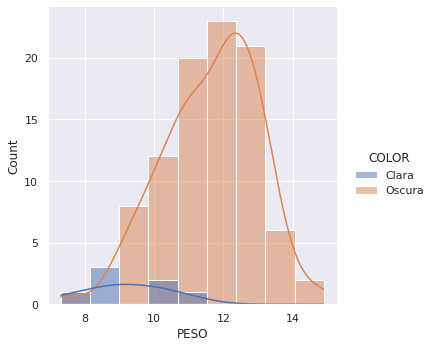

In [46]:
sns.displot(data=T12L, x="PESO", hue="COLOR", kde=True)

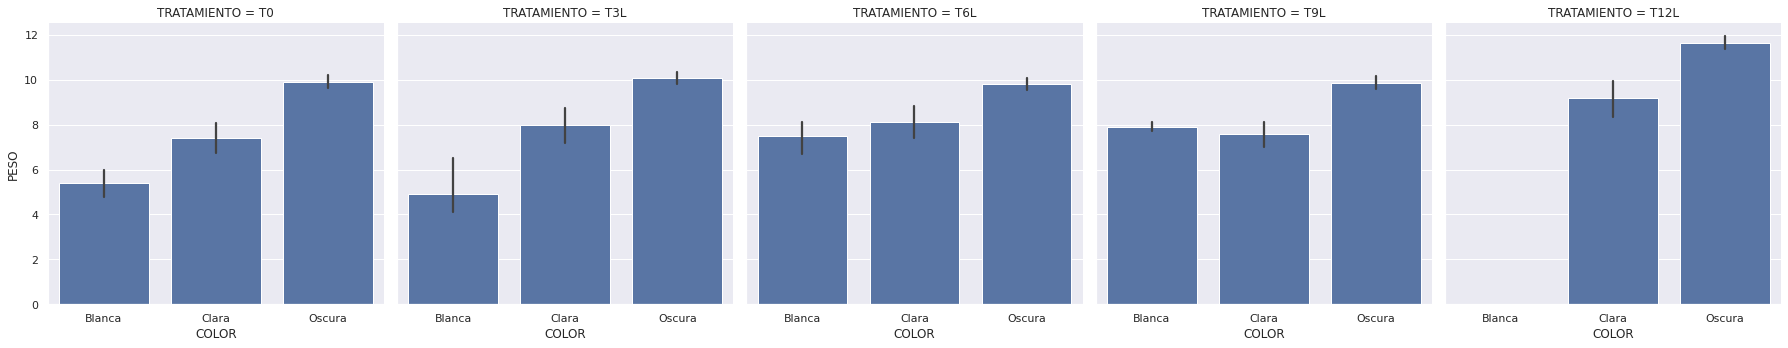

In [47]:
sns.catplot(df, kind="bar", x='COLOR', y="PESO", col="TRATAMIENTO")

<Axes: xlabel='TRATAMIENTO', ylabel='BRIX'>

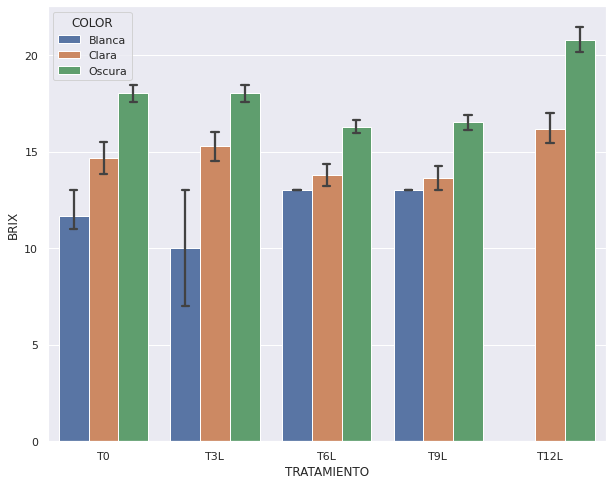

In [49]:
sns.barplot(data=df, x='TRATAMIENTO', y='BRIX', hue='COLOR', capsize=.2)